In [1]:
import pandas as pd
import numpy as np
import statsmodels.tools.eval_measures as sm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder ## research this - reads a string variable as a number 
from sklearn.compose import ColumnTransformer ## works alongside the above - keeps 'under the hood'.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler,KBinsDiscretizer)

# machine learning stack
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# miscellaneous
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

# <ins>Cluster Analysis of Car Price and Fuel Consumption<ins>

To succeed in the highly competitive automotive industry, it is important to understand customer preferences and target specific market segments. It is crucial for a car business to identify and offer products to distinct groups of customers based on factors.

In this challenge, we try to cluster cars based on their price and fuel consumption attributes. By analyzing these clusters, we can gain a deeper understanding of the market landscape and identify target customer segments with similar preferences and needs.

Follow the steps below in order to accomplish this:

1. Read in the cleaned and imputed dataset that you have saved in the impute missing values challenge

2. Subset the price and fuel consumption related information

3. Check the distribution of data and standardize it if necessddary

4. Use the elbow method to determine the number of clusters

5. Repeat k-means clustering using the appropriate number of clusters selected from the elbow method. Visualize the results.

6. What information can you provide regarding the various clusters?

### 1. Read in the cleaned and imputed dataset that you have saved in the impute missing values challenge

In [3]:
df = pd.read_csv('../data/cars_imputed.csv')
df.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,popularity,price
0,Audi,200,1991,regular unleaded,217.0,5.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,22,16,3105,2000
1,Buick,LaCrosse,2016,flex-fuel (unleaded/E85),304.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,28,18,155,33810
2,Infiniti,EX,2013,premium unleaded (recommended),325.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,25,17,190,36900
3,Toyota,4Runner,2015,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,21,17,2031,41310
4,Infiniti,M56,2011,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,25,16,190,58450


### 2. Subset the price and fuel consumption related information

In [4]:
df_prep = df[['price','highway_mpg','city_mpg']]
df_prep

,price,highway_mpg,city_mpg
0,2000,22,16
1,33810,28,18
2,36900,25,17
3,41310,21,17
4,58450,25,16
...,...,...,...
11194,30785,26,18
11195,54450,30,20
11196,24599,21,16
11197,257412,17,13


### 3. Check the distribution of data and standardize it if necessddary

In [7]:
df_prep.describe()

,price,highway_mpg,city_mpg
count,1.119900e+04,11199.000000,11199.000000
mean,4.192593e+04,26.610590,19.731851
std,6.153505e+04,8.977641,9.177555
min,2.000000e+03,12.000000,7.000000
25%,2.159950e+04,22.000000,16.000000
50%,3.067500e+04,25.000000,18.000000
75%,4.303250e+04,30.000000,22.000000
max,2.065902e+06,354.000000,137.000000


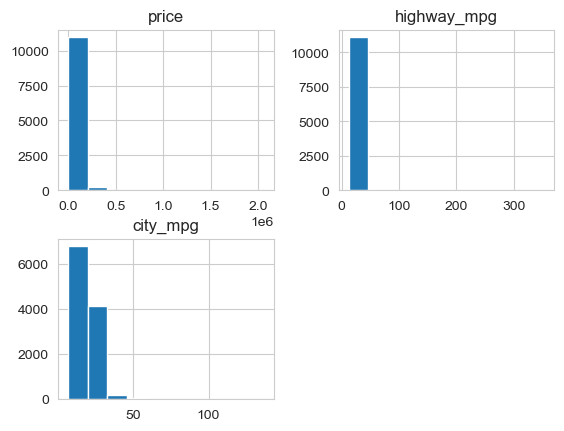

In [8]:
df_prep.hist();

# <ins> Scaling through Standardisation <ins>

In [9]:
scaler1 = StandardScaler() # standardization

scaler1.fit(df_prep) # fitting/appying the standardization to the DF

df_num_scaled = scaler1.transform(df_prep) # transforming/confirming the standardization to the DF
df_num_scaled # output is an array

array([[-0.64886128, -0.51358661, -0.40664617],
       [-0.13189702,  0.15477026, -0.18871348],
       [-0.08167949, -0.17940817, -0.29767983],
       ...,
       [-0.28159076, -0.62497942, -0.40664617],
       [ 3.5019993 , -1.07055067, -0.73354521],
       [-0.0787542 ,  0.4889487 ,  0.2471519 ]])

In [13]:
df_scaled = pd.DataFrame(df_num_scaled, columns = df_prep.columns)
df_scaled

,price,highway_mpg,city_mpg
0,-0.648861,-0.513587,-0.406646
1,-0.131897,0.154770,-0.188713
2,-0.081679,-0.179408,-0.297680
3,-0.010010,-0.624979,-0.297680
4,0.268543,-0.179408,-0.406646
...,...,...,...
11194,-0.181058,-0.068015,-0.188713
11195,0.203537,0.377556,0.029219
11196,-0.281591,-0.624979,-0.406646
11197,3.501999,-1.070551,-0.733545


### 4. Use the elbow method to determine the number of clusters

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

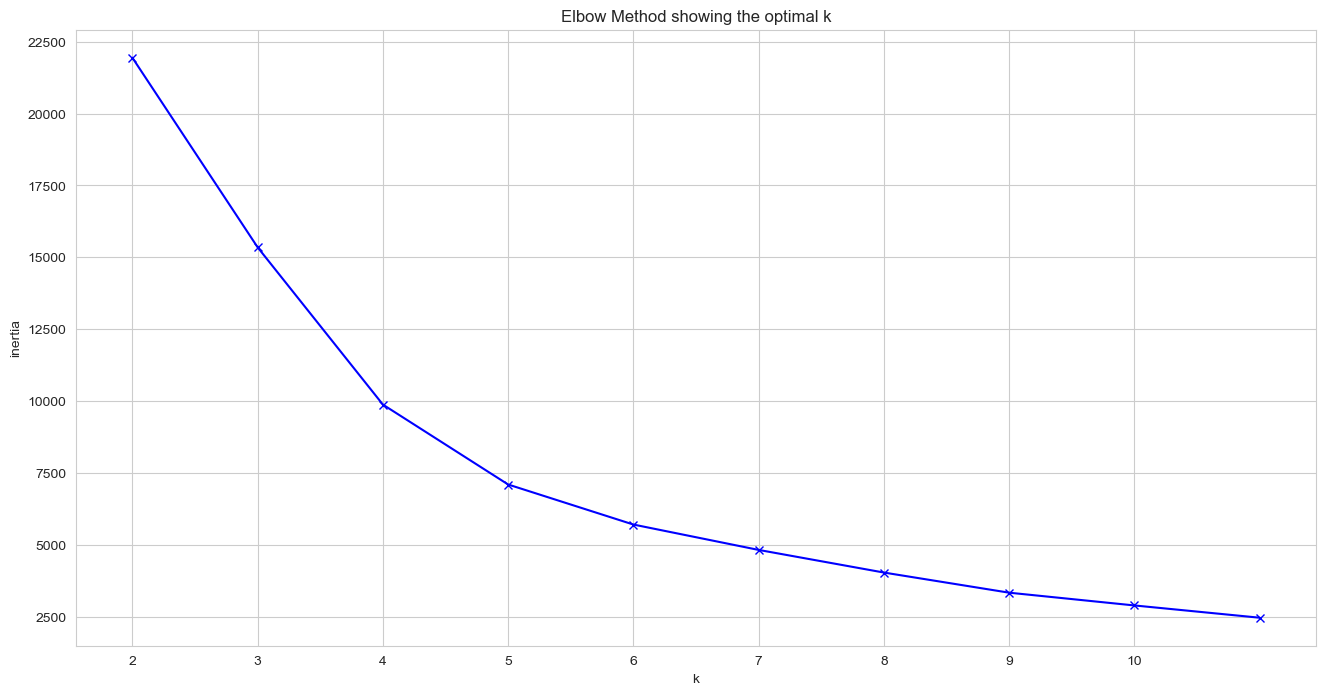

In [16]:
K = range(2, 12) #let's give it a range of cluster searches
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # k range on x-axis, inertia on y-axis, and markers will be 'x'
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

### 5. Repeat k-means clustering using the appropriate number of clusters selected from the elbow method. Visualize the results.

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [18]:
clusters = kmeans.predict(df_scaled)
clusters

array([2, 2, 2, ..., 2, 1, 0], dtype=int32)

### Checking the clustering splits after Standardisation scaling...

In [20]:
pd.Series(clusters).value_counts().sort_index()

0    3682
1     380
2    7070
3      67
dtype: int64

In [233]:
df_4clusters = df_scaled.copy() 
df_4clusters["cluster"] = clusters
df_4clusters.columns

Index(['price', 'highway_mpg', 'city_mpg', 'cluster'], dtype='object')

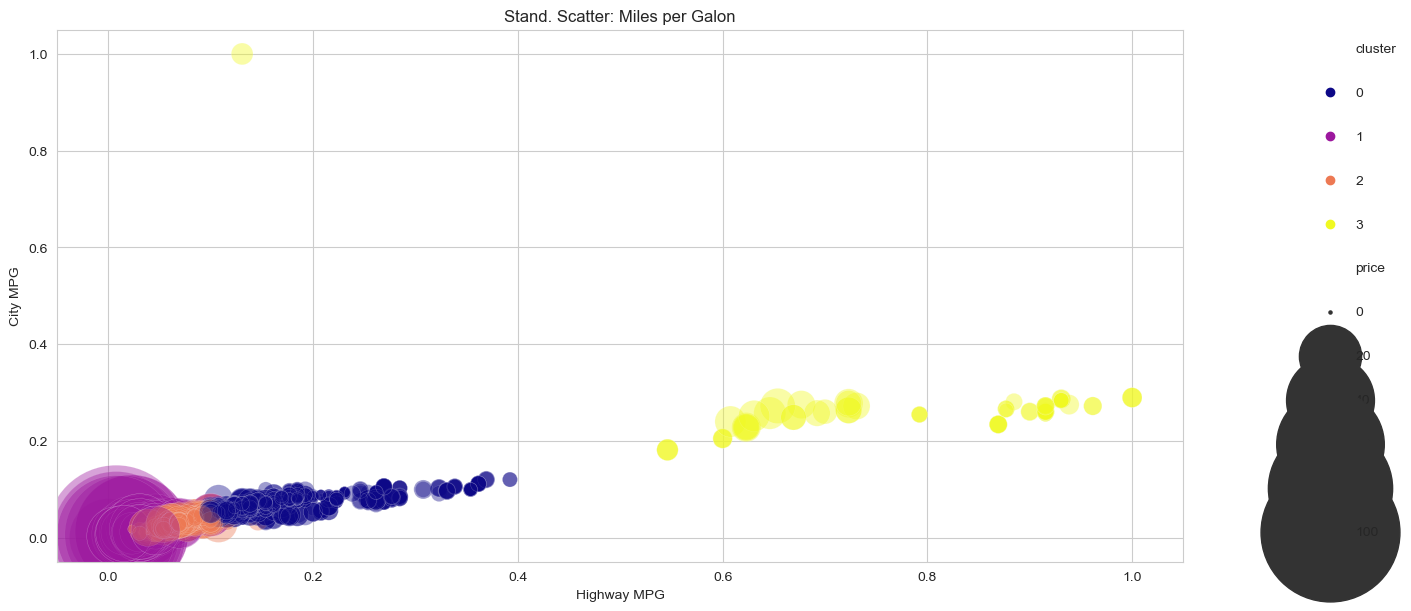

In [266]:
weighting = df_4clusters['price']*100

plt.figure(figsize=(14,6),layout='constrained')
sns.scatterplot(data = df_4clusters, 
                x = 'city_mpg', 
                y = 'highway_mpg',
                size = weighting,
                sizes=(5, 10000),
                palette = 'plasma', 
                hue = 'cluster', 
                alpha = 0.4)


plt.xlabel('Highway MPG')
plt.ylabel('City MPG')
plt.title('Stand. Scatter: Miles per Galon')

plt.legend(bbox_to_anchor=(1.2, 1), frameon=False, fontsize=10,labelspacing=2.25);

plt.savefig(f'../visuals/01_01_standarised_scatter_mpg');

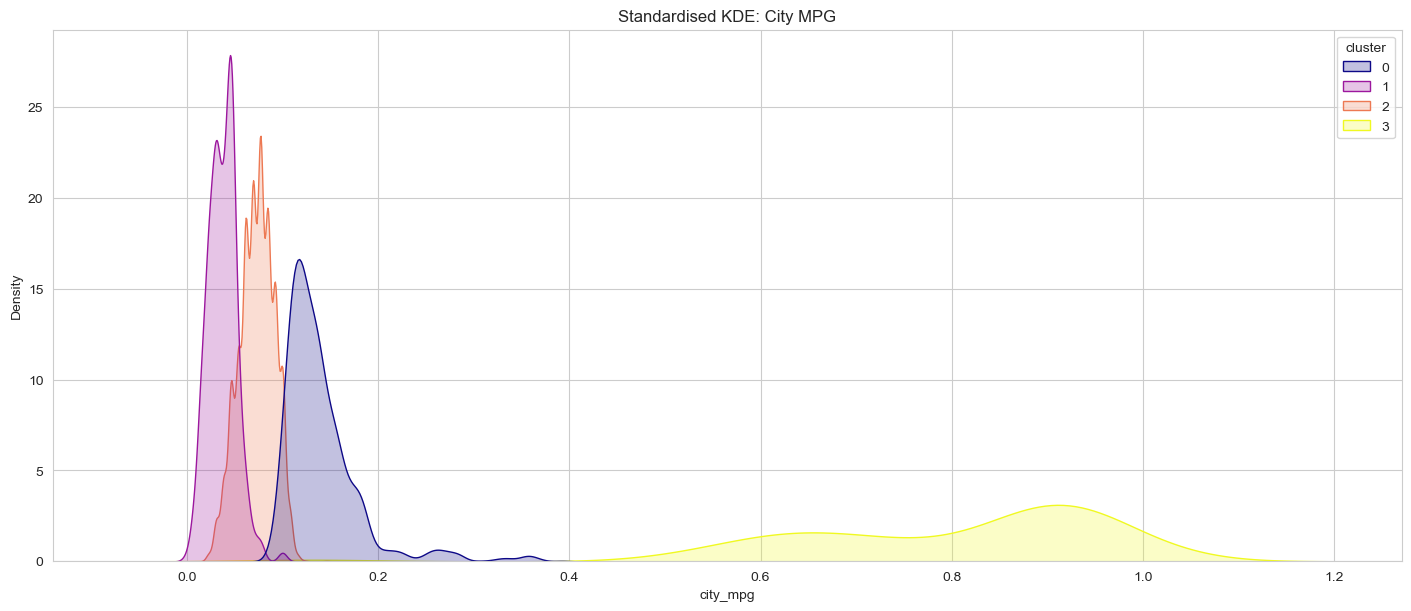

In [267]:
plt.figure(figsize=(14,6),layout='constrained')
sns.kdeplot(data = df_4clusters,
            x = 'city_mpg',
            hue = 'cluster',
            fill = True,
            common_norm=False,
            palette = 'plasma');
plt.title('Standardised KDE: City MPG');

plt.savefig(f'../visuals/01_02_standarised_kde_citympg');

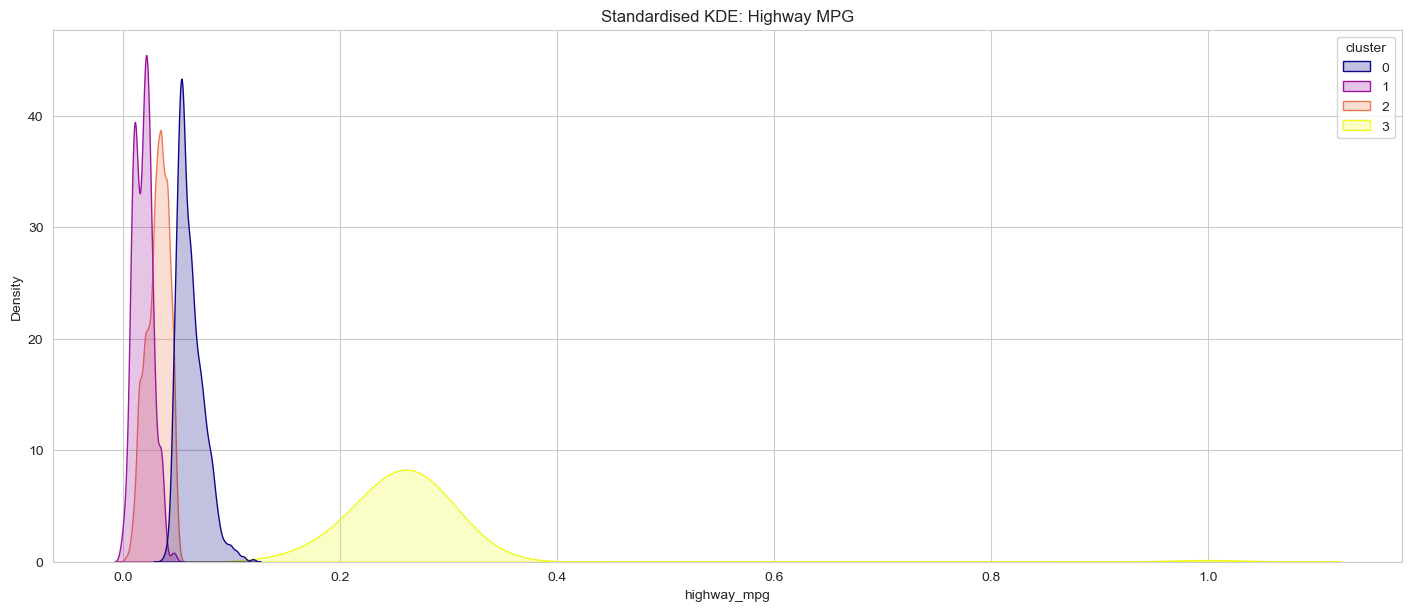

In [268]:
plt.figure(figsize=(14,6),layout='constrained')
sns.kdeplot(data = df_4clusters,
            x = 'highway_mpg',
            hue = 'cluster',
            fill = True,
            common_norm=False,
            palette = 'plasma'
           );
plt.title('Standardised KDE: Highway MPG');
plt.savefig(f'../visuals/01_03_standarised_kde_hwaympg');

In [256]:
y_stan = df_4clusters.groupby('cluster')['price'].mean()
y_stan_df = pd.DataFrame(y_stan).reset_index()
y_stan_df

,cluster,price
0,0,0.011860
1,1,0.136027
2,2,0.016944
3,3,0.022287


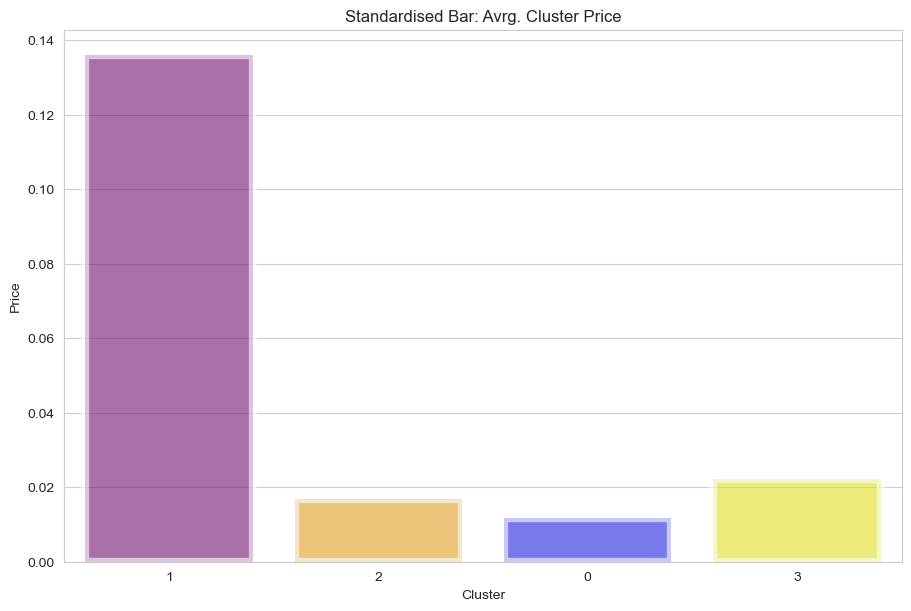

In [269]:
plt.figure(figsize=(9,6),layout='constrained')
bar_col = ['purple','orange','blue','yellow']

ax=sns.barplot(data = y_stan_df,
            x = 'cluster', 
            y = 'price',
            palette = bar_col,
            order = [1,2,0,3],alpha=0.6
            )
plt.setp(ax.patches, linewidth=6)
plt.xlabel('Cluster')
plt.ylabel('Price')

plt.title('Standardised Bar: Avrg. Cluster Price');
plt.savefig(f'../visuals/01_04_standarised_bar_price');

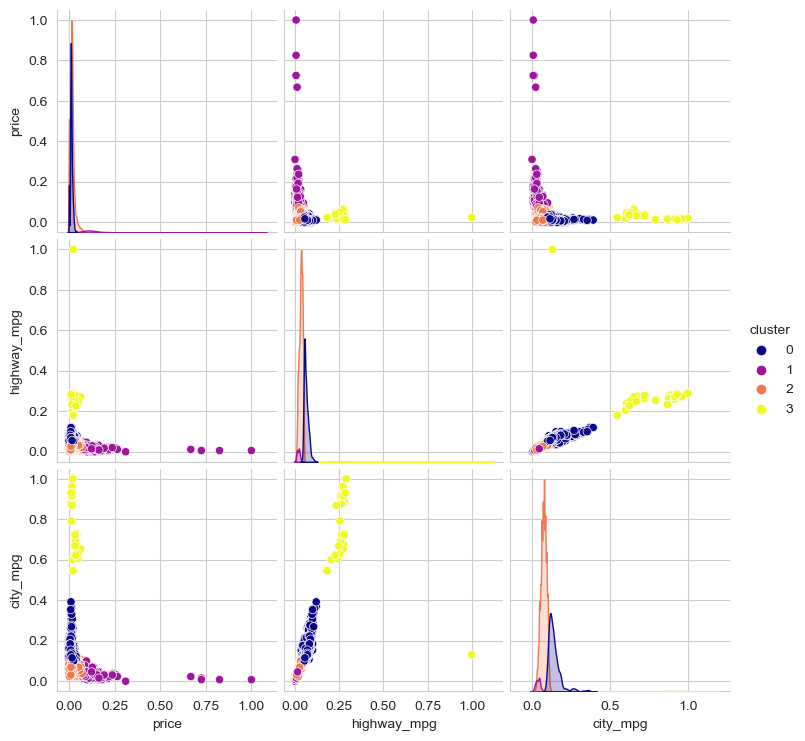

In [270]:
sns.pairplot(data=df_4clusters,
             hue='cluster',
             palette='plasma', 
             corner=False);

plt.savefig(f'../visuals/01_05_standarised_pairplot_price2mpg');

### Standardisation scaling summary

+ **<ins>Group 1<ins>**

Highly efficient and most expensive

+ **<ins>Group 2<ins>**

High efficiency and good value

+ **<ins>Group 0<ins>**

Good efficiency and best value

+ **<ins>Group 3<ins>**

Highly inefficient and mid-value


# <ins>Scaling through Normalisation<ins>

In [37]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_num_norm = min_max_scaler.fit_transform(df_prep)
df_num_norm

array([[0.        , 0.02923977, 0.06923077],
       [0.01541255, 0.04678363, 0.08461538],
       [0.01690972, 0.0380117 , 0.07692308],
       ...,
       [0.01094965, 0.02631579, 0.06923077],
       [0.123752  , 0.01461988, 0.04615385],
       [0.01699693, 0.05555556, 0.11538462]])

In [38]:
df_norm = pd.DataFrame(df_num_norm, columns = df_prep.columns)
df_norm

,price,highway_mpg,city_mpg
0,0.000000,0.029240,0.069231
1,0.015413,0.046784,0.084615
2,0.016910,0.038012,0.076923
3,0.019046,0.026316,0.076923
4,0.027351,0.038012,0.069231
...,...,...,...
11194,0.013947,0.040936,0.084615
11195,0.025413,0.052632,0.100000
11196,0.010950,0.026316,0.069231
11197,0.123752,0.014620,0.046154


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

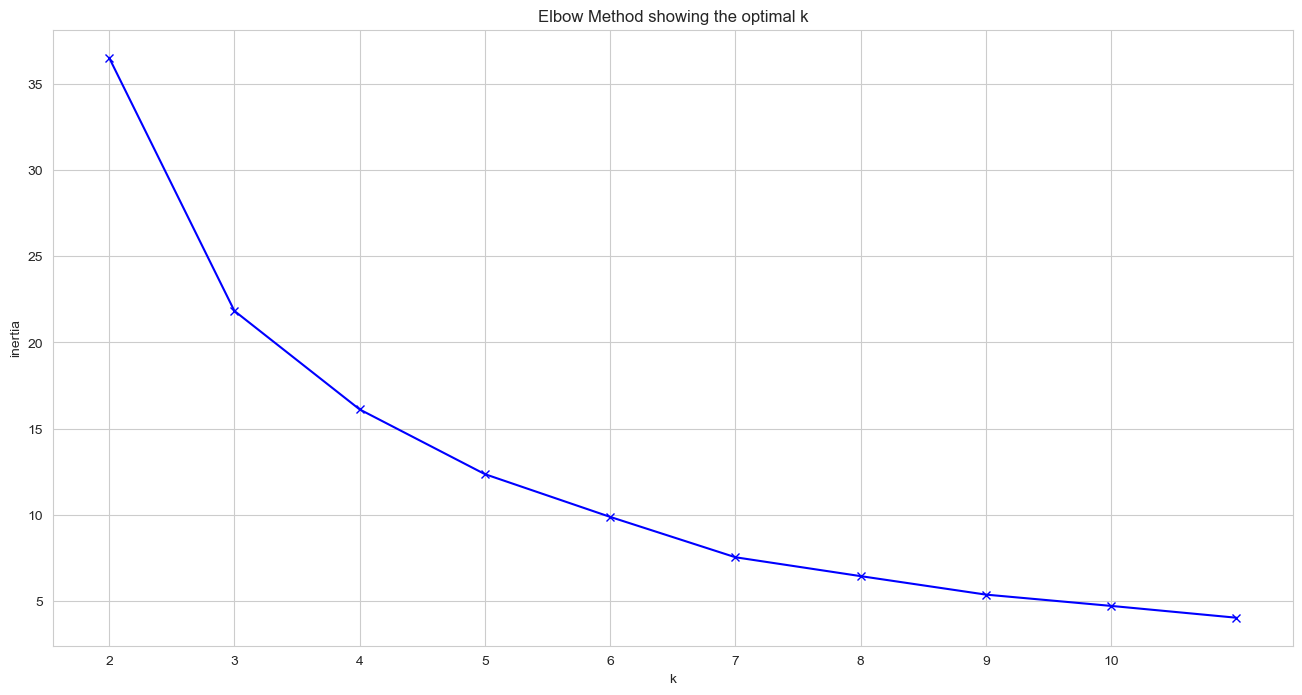

In [39]:
K = range(2, 12) #let's give it a range of cluster searches
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_norm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # k range on x-axis, inertia on y-axis, and markers will be 'x'
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_norm)

KMeans(n_clusters=3, random_state=42)

In [41]:
clusters2 = kmeans.predict(df_norm)
clusters2

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

### checking the clustering splits after Normalisation scaling...

In [42]:
pd.Series(clusters2).value_counts().sort_index()

0    7638
1      66
2    3495
dtype: int64

In [231]:
df_3clusters = df_norm.copy() 
df_3clusters["cluster"] = clusters2
df_3clusters.describe()

,price,highway_mpg,city_mpg,cluster
count,11199.000000,11199.000000,11199.000000,11199.000000
mean,0.019345,0.042721,0.097937,0.630056
std,0.029815,0.026250,0.070597,0.925918
min,0.000000,0.000000,0.000000,0.000000
25%,0.009496,0.029240,0.069231,0.000000
50%,0.013894,0.038012,0.084615,0.000000
75%,0.019881,0.052632,0.115385,2.000000
max,1.000000,1.000000,1.000000,2.000000


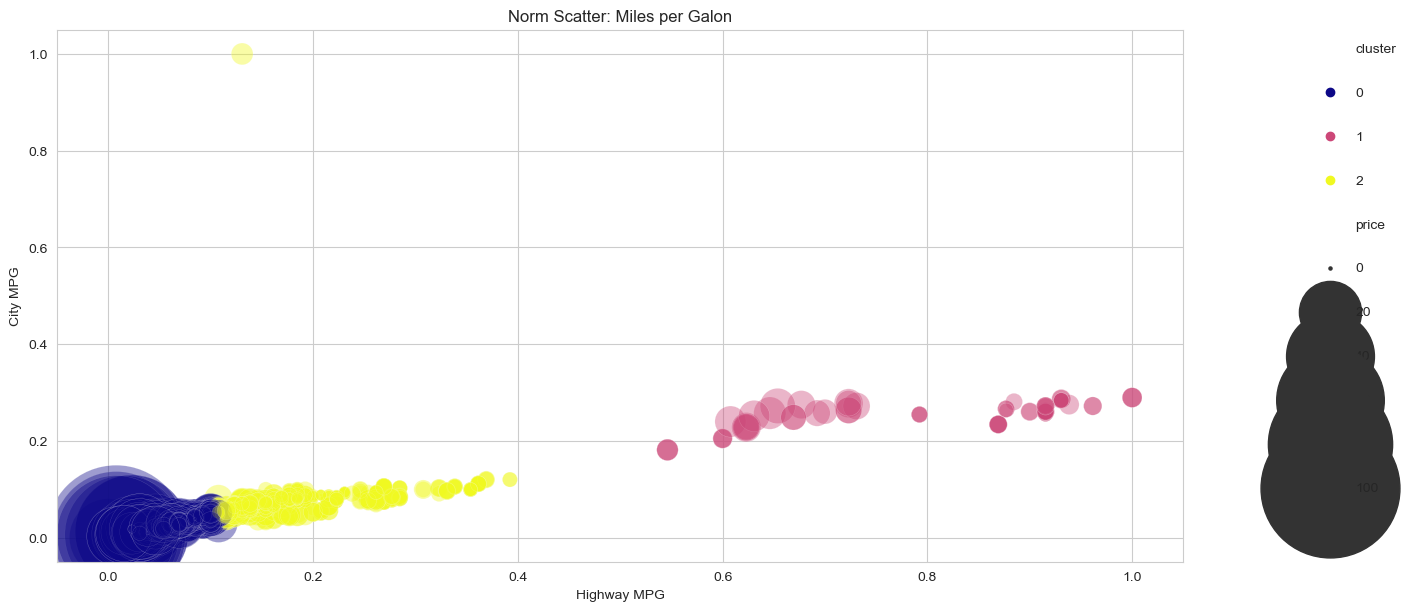

In [271]:
weighting = df_3clusters['price']*100

plt.figure(figsize=(14,6),layout='constrained')
sns.scatterplot(data = df_3clusters, 
                x = 'city_mpg', 
                y = 'highway_mpg',
                size = weighting,
                sizes=(5, 10000),
                palette = 'plasma', 
                hue = 'cluster', 
                alpha = 0.4)


plt.xlabel('Highway MPG')
plt.ylabel('City MPG')
plt.title('Norm Scatter: Miles per Galon')

plt.legend(bbox_to_anchor=(1.2, 1), frameon=False, fontsize=10,labelspacing=2.25);

plt.savefig(f'../visuals/02_01_normalise_scatter_price2mpg');

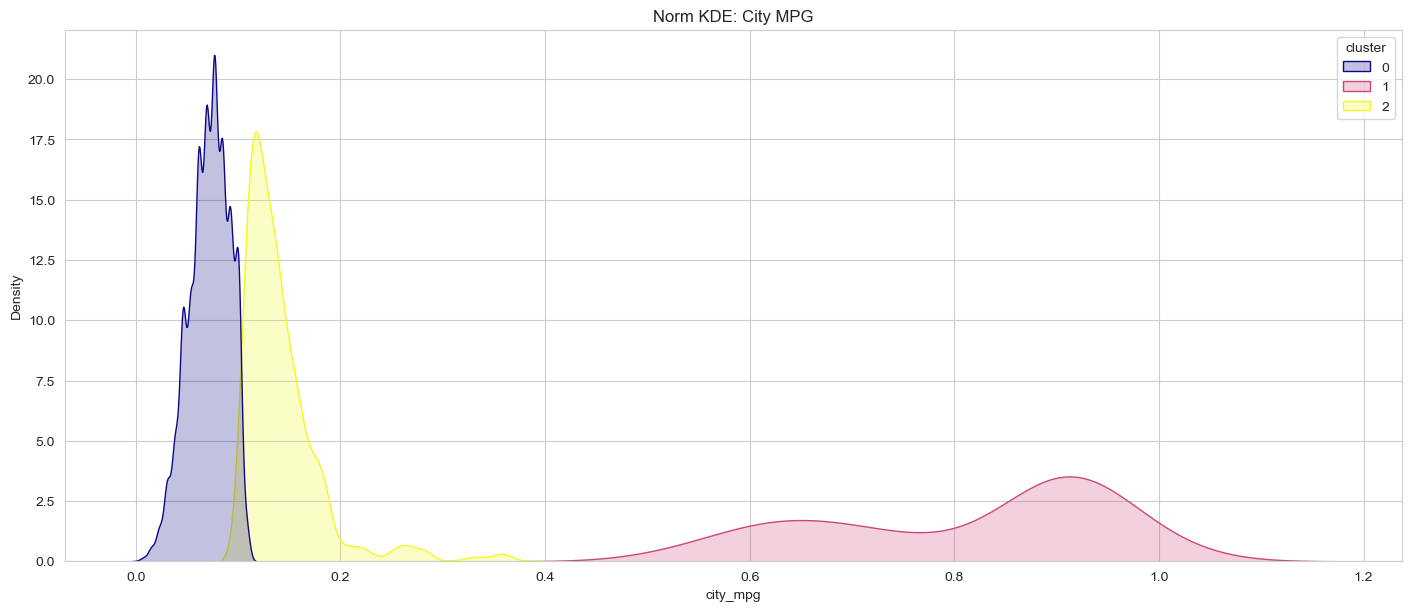

In [272]:
plt.figure(figsize=(14,6),layout='constrained')
sns.kdeplot(data = df_3clusters,
            x = 'city_mpg',
            hue = 'cluster',
            fill = True,
            common_norm=False,
            palette = 'plasma');
plt.title('Norm KDE: City MPG');
plt.savefig(f'../visuals/02_02_normalise_kde_citympg');

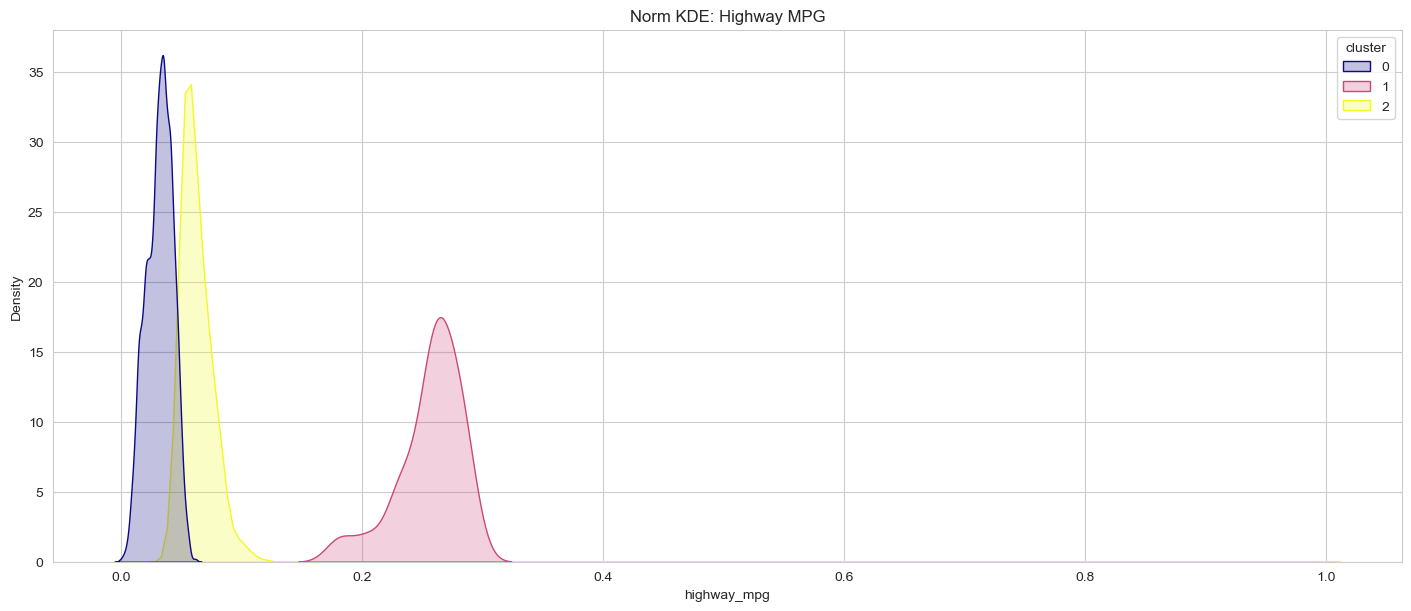

In [273]:
plt.figure(figsize=(14,6),layout='constrained')
sns.kdeplot(data = df_3clusters,
            x = 'highway_mpg',
            hue = 'cluster',
            fill = True,
            common_norm=False,
            palette = 'plasma'
           );
plt.title('Norm KDE: Highway MPG');
plt.savefig(f'../visuals/02_03_normalise_kde_hwaympg');

In [281]:
y_val = df_3clusters.groupby('cluster')['price'].mean()
y_df = pd.DataFrame(y_val).reset_index()
y_df

,cluster,price
0,0,0.022914
1,1,0.022260
2,2,0.011489


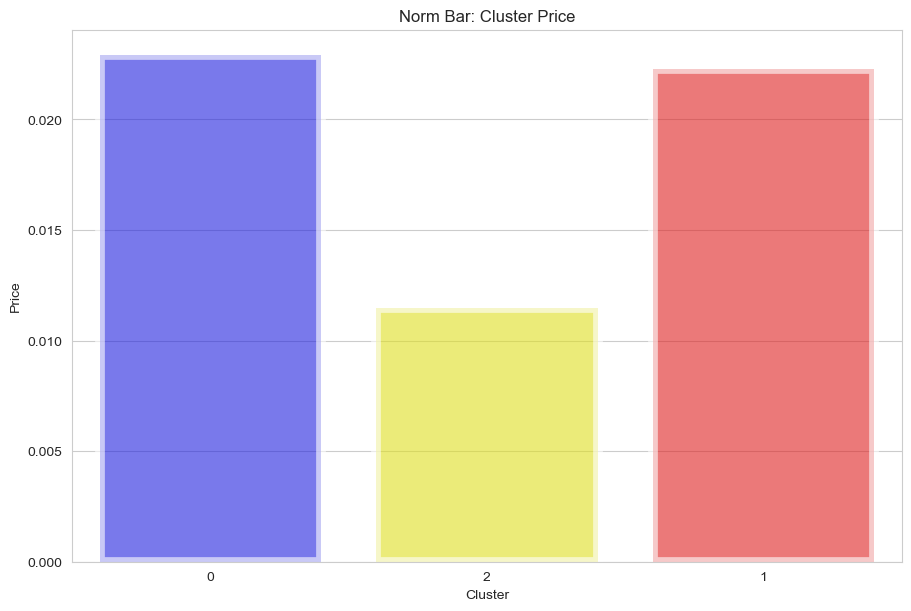

In [282]:
plt.figure(figsize=(9,6),layout='constrained')
bar_col = ['blue','yellow','red']

ax=sns.barplot(data = y_df,
            x = 'cluster', 
            y = 'price',
            palette = bar_col,
            order = [0,2,1],alpha=0.6
            )
plt.setp(ax.patches, linewidth=7)
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.title('Norm Bar: Cluster Price');
plt.savefig('../visuals/02_04_normalise_bar_price');

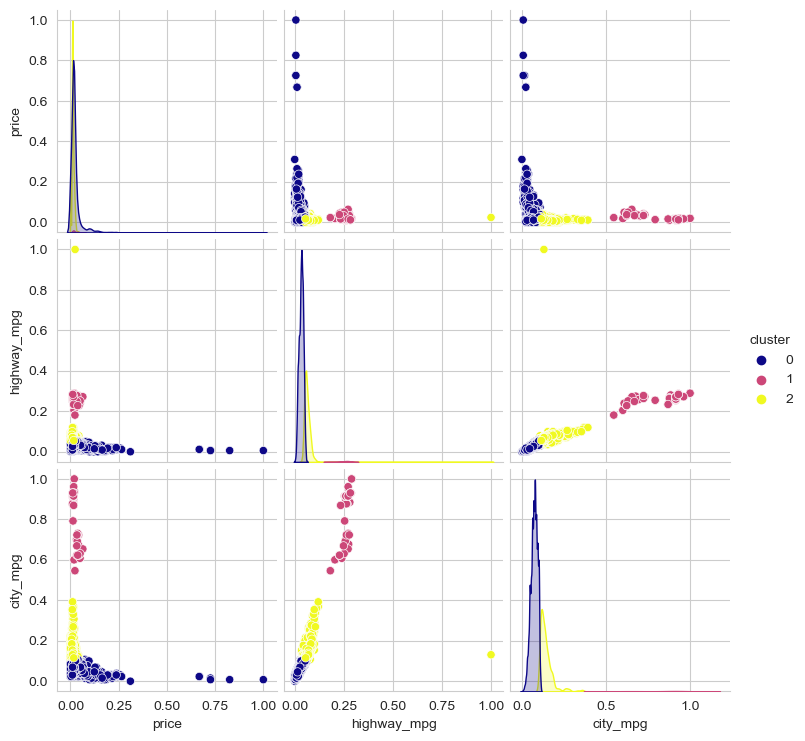

In [275]:
sns.pairplot(data=df_3clusters,
             hue='cluster',
             palette='plasma',
             corner=False)

plt.savefig('../visuals/02_05_normalise_pairplot_price2mpg');

### This clustering appears to find a greater commonality in pricing, compared to standardisation scaling (see outlier)

+ **<ins>Group 0<ins>**

Highly efficient and most expensive

+ **<ins>Group 2<ins>**

Generally good efficiency and best value, however outlier included as most inefficient _City MPG_

+ **<ins>Group 1<ins>**

Least efficient and generally expensive.


# <ins>Clustering without scaling<ins>

In [ ]:
## original price and MPG data = df_prep

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

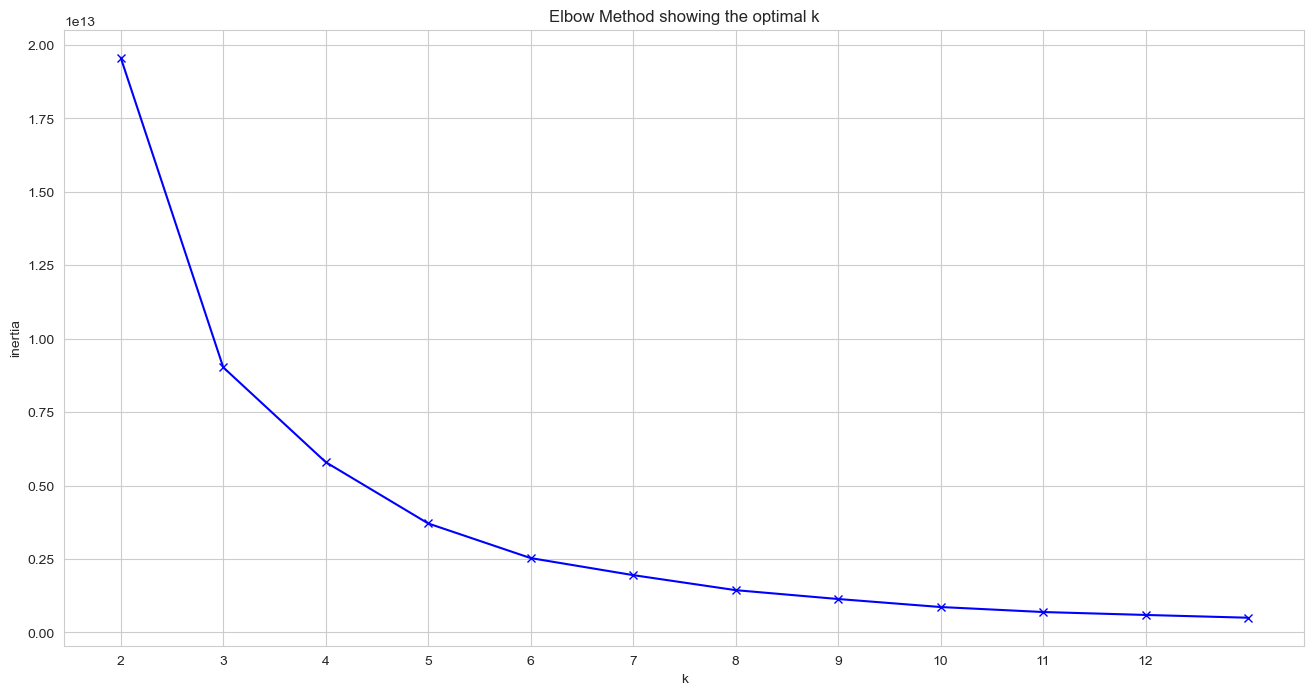

In [214]:
## Elbow Method

K = range(2, 14) #let's give it a range of cluster searches
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_prep)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # k range on x-axis, inertia on y-axis, and markers will be 'x'
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

In [217]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_prep)

KMeans(n_clusters=3, random_state=42)

In [218]:
clust_prep = kmeans.predict(df_prep)
clust_prep

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

### Checking the clustering splits after no scaling...

In [219]:
pd.Series(clust_prep).value_counts().sort_index()

0    10757
1      436
2        6
dtype: int64

In [220]:
df_prep_clust = df_prep.copy() 
df_prep_clust["cluster"] = clust_prep
df_prep_clust.columns

Index(['price', 'highway_mpg', 'city_mpg', 'cluster'], dtype='object')

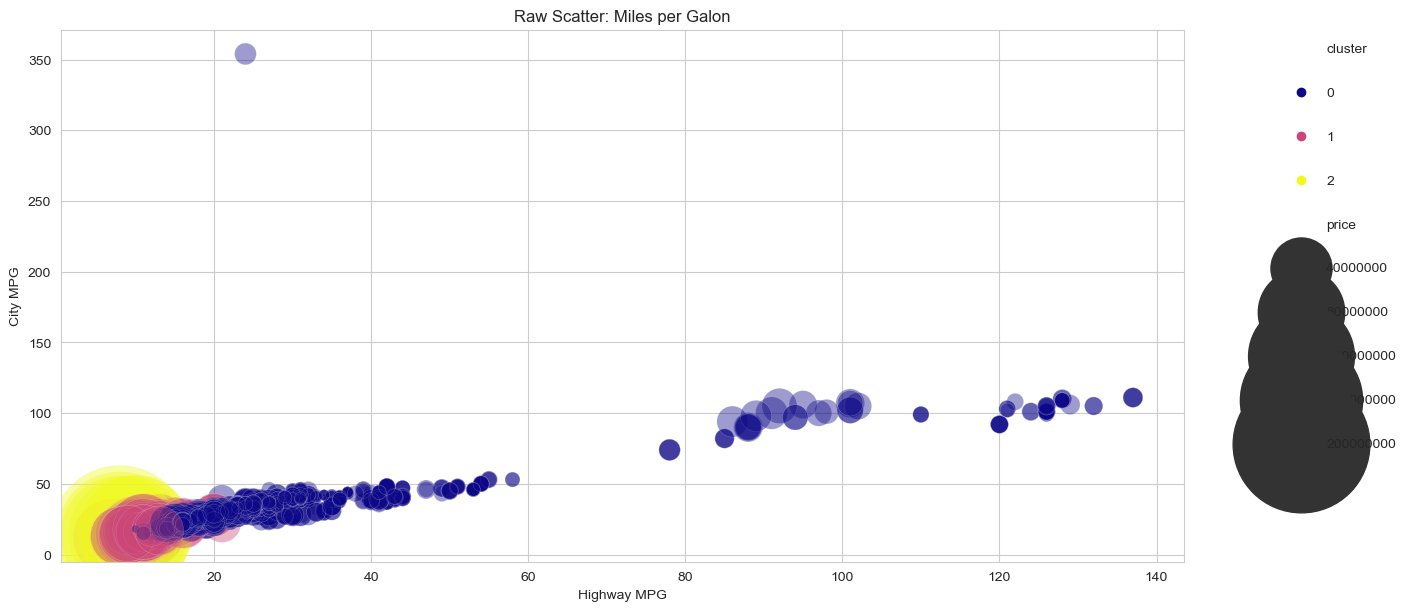

In [276]:
weighting = df_prep_clust['price']*100

plt.figure(figsize=(14,6),layout='constrained')
sns.scatterplot(data = df_prep_clust, 
                x = 'city_mpg', 
                y = 'highway_mpg',
                size = weighting,
                sizes=(5, 10000),
                palette = 'plasma', 
                hue = 'cluster', 
                alpha = 0.4)


plt.xlabel('Highway MPG')
plt.ylabel('City MPG')
plt.title('Raw Scatter: Miles per Galon')

plt.legend(bbox_to_anchor=(1.2, 1), frameon=False, fontsize=10,labelspacing=2.25);


plt.savefig('../visuals/03_01_raw_scatter_mpg');

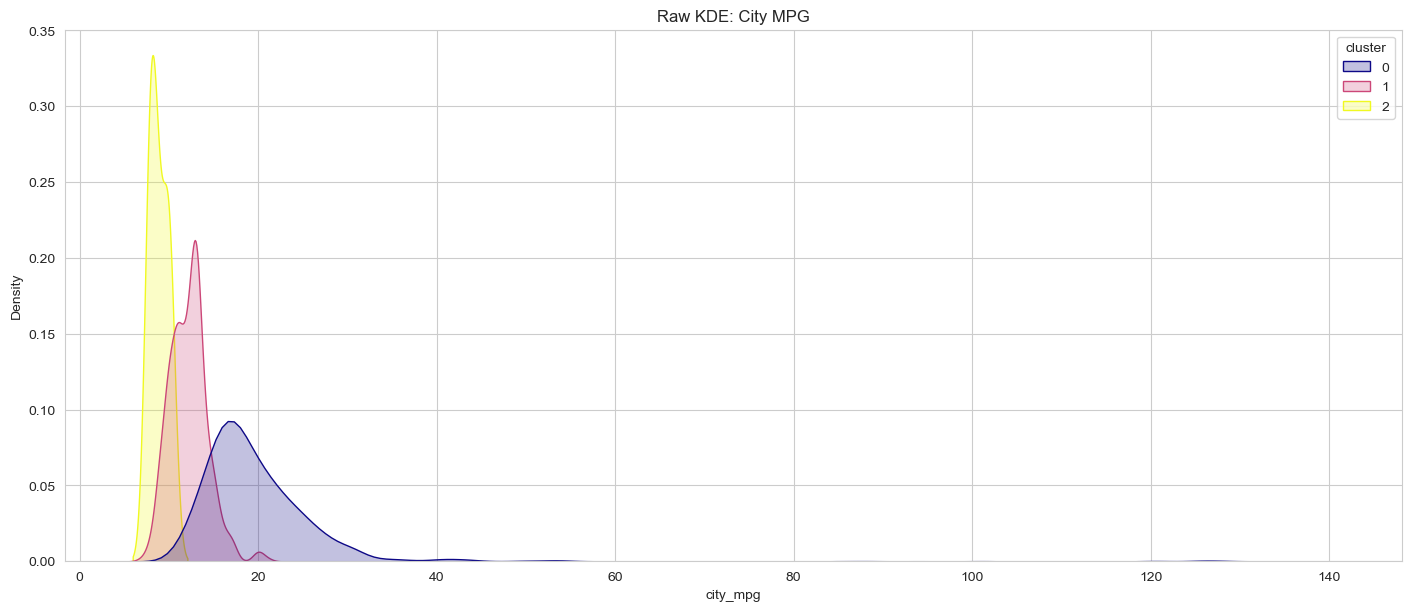

In [277]:
plt.figure(figsize=(14,6),layout='constrained')
sns.kdeplot(data = df_prep_clust,
            x = 'city_mpg',
            hue = 'cluster',
            fill = True,
            common_norm=False,
            palette = 'plasma');
plt.title('Raw KDE: City MPG');
plt.savefig('../visuals/03_02_raw_kde_cityympg');

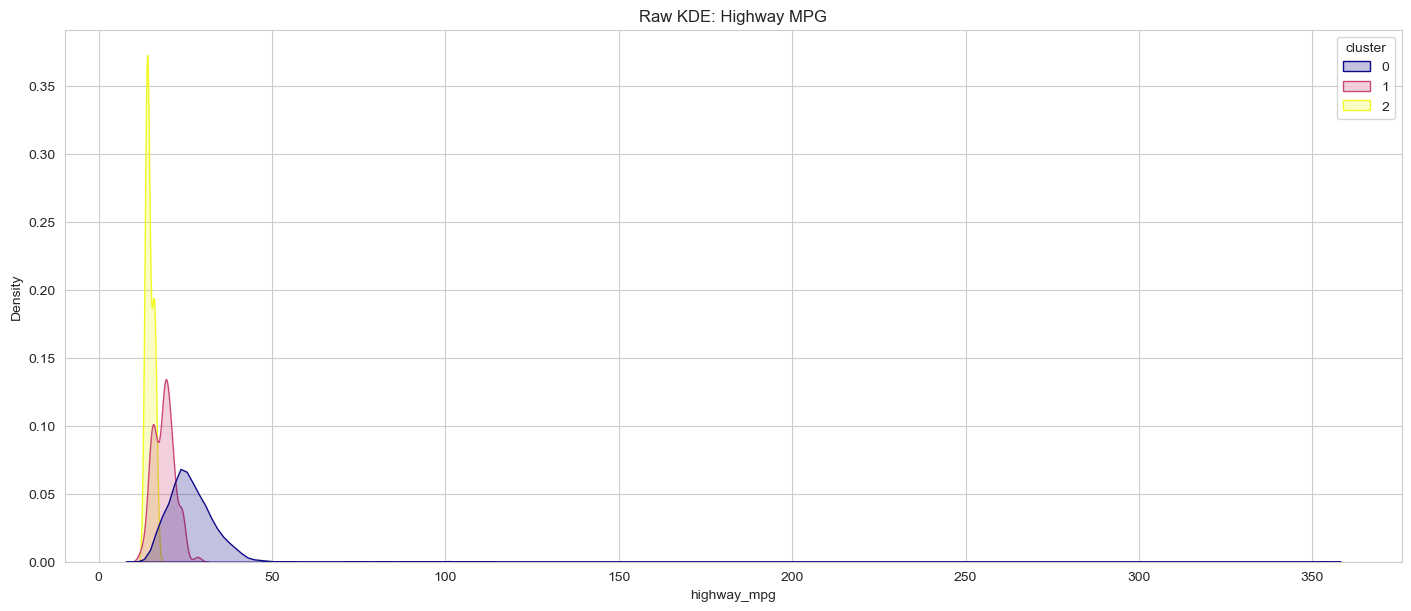

In [278]:
plt.figure(figsize=(14,6),layout='constrained')
sns.kdeplot(data = df_prep_clust,
            x = 'highway_mpg',
            hue = 'cluster',
            fill = True,
            common_norm=False,
            palette = 'plasma'
           );
plt.title('Raw KDE: Highway MPG');
plt.savefig('../visuals/03_03_raw_kde_hwaympg');

In [260]:
df_prep_clust.groupby('cluster')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,10757.0,3.280033e+04,21642.732169,2000.0,21210.00,29970.0,41125.00,138800.0
1,436.0,2.457819e+05,91524.785873,139900.0,183521.25,218950.0,286975.00,643330.0
2,6.0,1.589070e+06,261966.619982,1380000.0,1412062.50,1500000.0,1654326.75,2065902.0


In [264]:
y_raw = df_prep_clust.groupby('cluster')['price'].mean()
y_raw_df = pd.DataFrame(y_raw).reset_index()
y_raw_df

,cluster,price
0,0,3.280033e+04
1,1,2.457819e+05
2,2,1.589070e+06


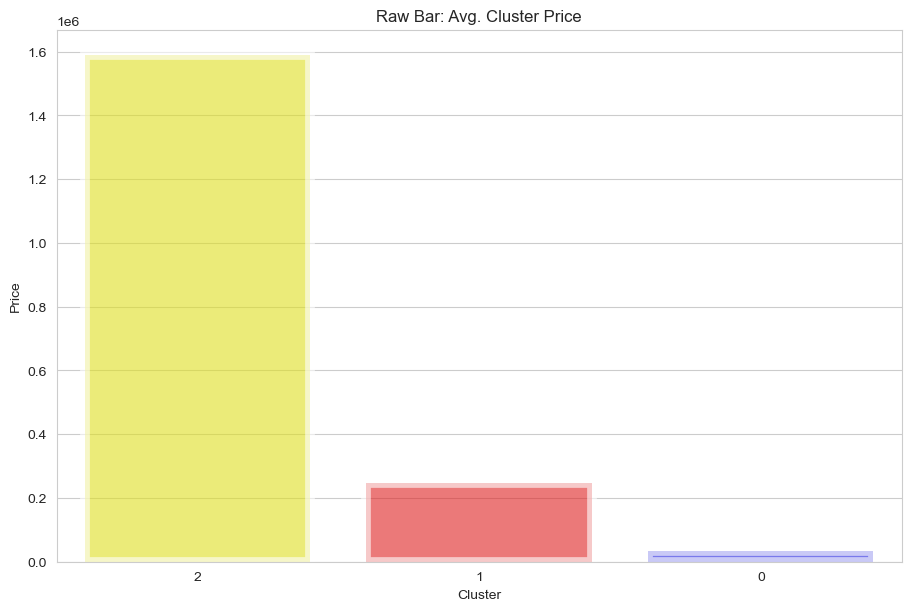

In [279]:
plt.figure(figsize=(9,6),layout='constrained')
bar_col = ['yellow','red', 'blue']

ax=sns.barplot(data = y_raw_df,
            x = 'cluster', 
            y = 'price',
            palette = bar_col,
            order = [2,1,0],alpha=0.6
            )
plt.setp(ax.patches, linewidth=7)
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.title('Raw Bar: Avg. Cluster Price')
plt.savefig('../visuals/03_04_raw_bar_price');

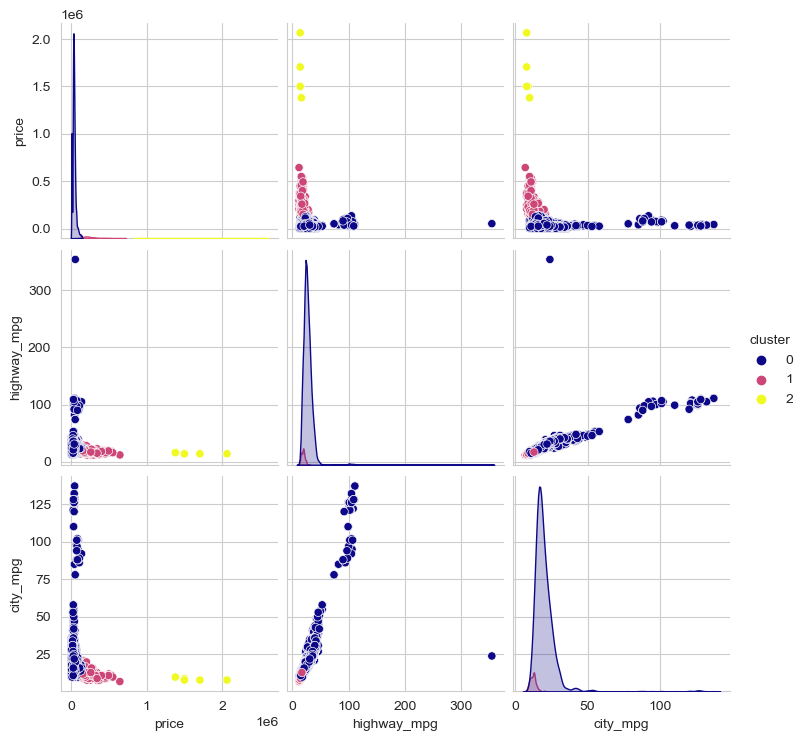

In [280]:
sns.pairplot(data=df_prep_clust,
             hue='cluster',
             palette='plasma',
             corner=False);

plt.savefig('../visuals/03_05_raw_pairplot_price2mpg');

### 6. What information can you provide regarding the various clusters?

Connect the clustering groups to the DF to get a clearer understanding

https://www.youtube.com/watch?v=bqhQ2LWBheQ
